## (PCA, Principal Component Analysis)
- 데이터의 분산을 최대한 보존하면서, 데이터의 주요 변동성을 설명하는 축(주성분)을 찾아 고차원 데이터를 저차원으로 변환하는 차원 축소 기법
- 주로 데이터의 시각화, 노이즈 제거, 그리고 데이터의 특성 추출에 사용

#### 1. PCA의 주요 단계
[코드잇-PCA](https://www.codeit.kr/topics/dimensionality-reduction/lessons/6348)

1. **표준화(Standardization)**:
   - PCA를 수행하기 전에, 각 특성의 평균을 0으로, 분산을 1로 맞추는 표준화를 수행합니다. 이는 서로 다른 스케일을 가진 특성들 사이의 불균형을 제거하기 위해 필요합니다.

2. **공분산 행렬 계산(Covariance Matrix Computation)**:
   - 표준화된 데이터에 대해 공분산 행렬을 계산합니다. 이 행렬은 데이터의 각 특성 간의 분산과 공분산을 나타냅니다. 공분산 행렬의 크기는 특성의 개수에 따라 결정됩니다.

3. **고유값과 고유벡터 계산(Eigenvalue and Eigenvector Calculation)**:
   - 공분산 행렬에서 고유값(eigenvalue)과 고유벡터(eigenvector)를 계산합니다. 고유값은 주성분의 중요도를 나타내며, 고유벡터는 주성분의 방향을 나타냅니다. 고유값이 클수록 해당 주성분이 데이터의 변동성을 더 많이 설명합니다.

4. **주성분 선택(Selection of Principal Components)**:
   - 고유값의 크기 순으로 정렬하고, 그에 대응하는 고유벡터를 선택하여 주성분을 결정합니다. 데이터의 총 변동성 중 일정 비율 이상을 설명하는 주성분을 선택하여 차원을 축소합니다.

5. **변환(Transformation)**:
   - 선택된 주성분(고유벡터)으로 데이터를 변환합니다. 이 변환된 데이터가 주성분 축에 투영된 데이터로, 원래 데이터의 중요한 변동성을 유지하면서 차원이 축소됩니다.

### PCA의 응용
- **이미지 압축**: 이미지 데이터를 주성분으로 변환하여 압축 및 전송 효율성을 높입니다.
- **데이터 시각화**: 고차원 데이터를 2D 또는 3D로 변환하여 시각적으로 분석합니다.
- **노이즈 감소**: 신호 처리에서 노이즈를 줄이고 중요한 신호만 남기기 위해 사용됩니다.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

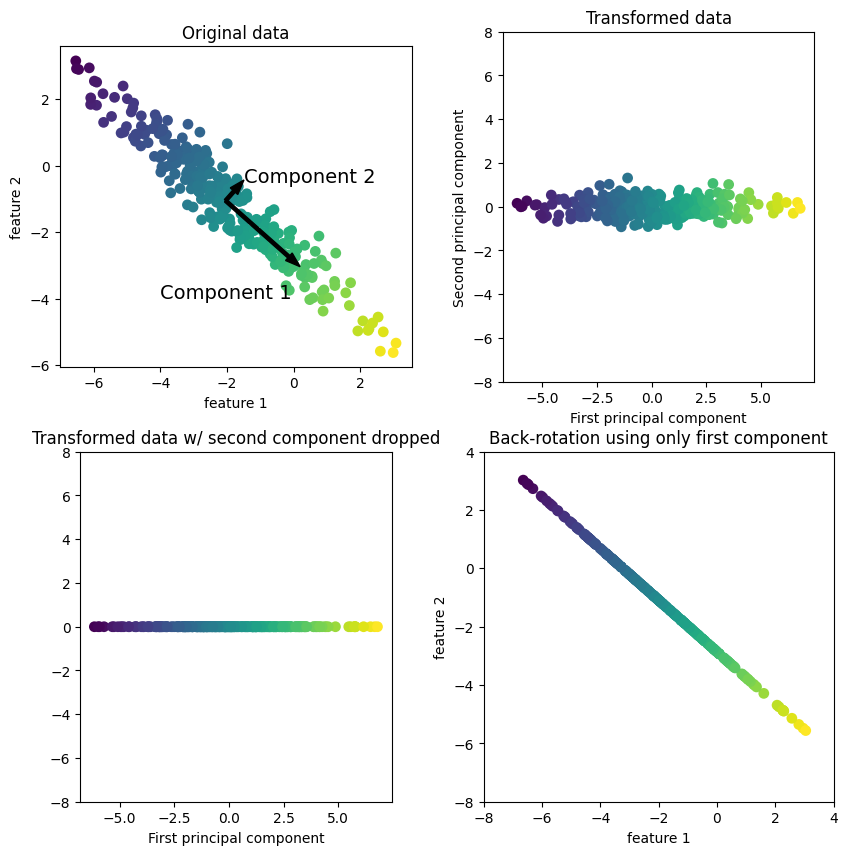

In [3]:
mglearn.plots.plot_pca_illustration()

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

X.shape, y.shape

((150, 4), (150,))

In [6]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_scaled = ss.fit_transform(X)

In [7]:
from sklearn.decomposition import PCA

# PCA 모델 생성 - 주성분 2개
pca = PCA(n_components=2)

# 모델 학습(규칙 설정)
pca.fit(X_scaled)

# 데이터 변환(PCA 적용)
X_pca = pca.transform(X_scaled)

In [14]:
print('원본 데이터 형태:', X_scaled.shape)
print('PCA 적용된 데이터 형태:', X_pca.shape)
print('PCA 적용된 특성의 중요도:', pca.explained_variance_)
print('PCA 적용된 특성의 중요도 비율:', pca.explained_variance_ratio_)

원본 데이터 형태: (150, 4)
PCA 적용된 데이터 형태: (150, 2)
PCA 적용된 특성의 중요도: [2.93808505 0.9201649 ]
PCA 적용된 특성의 중요도 비율: [0.72962445 0.22850762]


In [35]:
target_names = iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

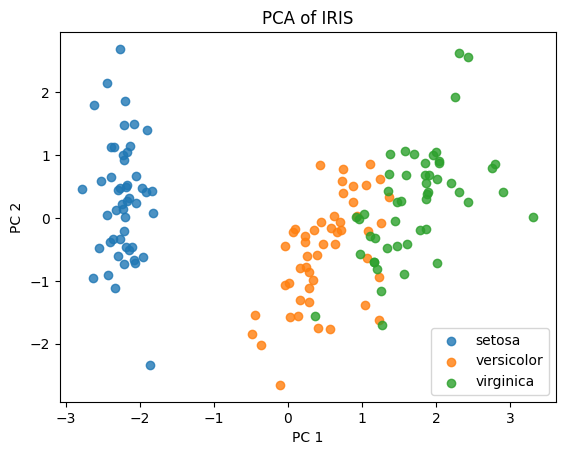

In [39]:
for i, target in enumerate(target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], alpha=.8, label=target)
    
plt.legend()
plt.title('PCA of IRIS')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

#### 와인 데이터셋 시각화 실습

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
wine = pd.read_csv('./dataset/wine.csv')

wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [53]:
X = wine.iloc[:, :-1].values
y = wine.iloc[:, -1].values

In [55]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_scaled = ss.fit_transform(X)

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

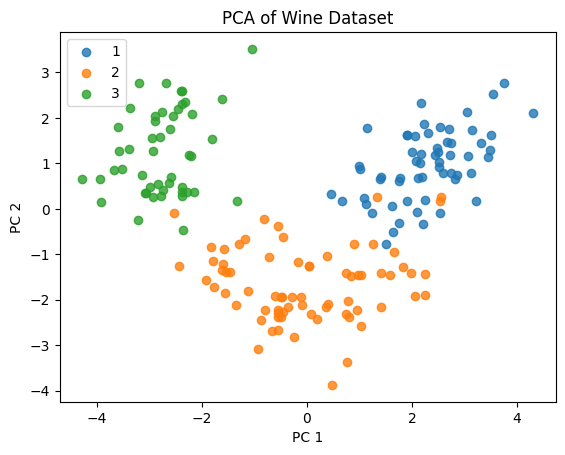

In [58]:
for i in range(1,4):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], alpha=.8, label=i)
    
plt.legend()
plt.title('PCA of Wine Dataset')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()